<a href="https://colab.research.google.com/github/douniagh/MyApplication-/blob/main/Training5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from sklearn.datasets import make_regression
 from sklearn.feature_selection import RFECV
 from sklearn import linear_model
 from sklearn import datasets
 import pandas as pd
 import numpy as np
 from sklearn.preprocessing import LabelEncoder
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import MinMaxScaler
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split, cross_val_score
 from sklearn.decomposition import PCA
 from sklearn import tree
 from sklearn.naive_bayes import GaussianNB
 from sklearn.linear_model import LogisticRegression
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.preprocessing import RobustScaler
 from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score
 from collections import Counter
 from sklearn.utils import shuffle
 import seaborn as sns
# from fancyimpute import IterativeImputer
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import dask.dataframe as dd
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/final.csv'

df = pd.read_csv(file_path,low_memory= False)
df.tail()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,http.file_data,http.content_length,...,tcp.srcport,udp.stream,dns.qry.name,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.ver,mbtcp.len,Attack_label,Attack_type
19793243,81334,3,1,0,0,0,0,0,0,0,...,9763,0,0,3,4,4,0,0,0,0
19793244,111552,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19793245,128124,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19793246,54862,3,1,0,0,0,0,0,0,0,...,3270,0,0,0,0,0,0,0,0,0
19793247,177483,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn import metrics

kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [3]:

from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and preprocess the dataset
# data = dd.read_csv('intrusion_dataset.csv')

X = df.drop('Attack_label', axis=1)
y = df['Attack_label']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature importances for Decision Tree')
    plt.show()

features_names = df.drop(['Attack_label', 'Attack_type'] , axis = 1)

# **Random Forest**

Training Accuracy RandomForestClassifier 99.95703711581437  Test Accuracy RandomForestClassifier 99.95723289505261
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 100.0
Training Recall RandomForestClassifier 99.9125981263649  Test Recall RandomForestClassifier 99.91304298696569


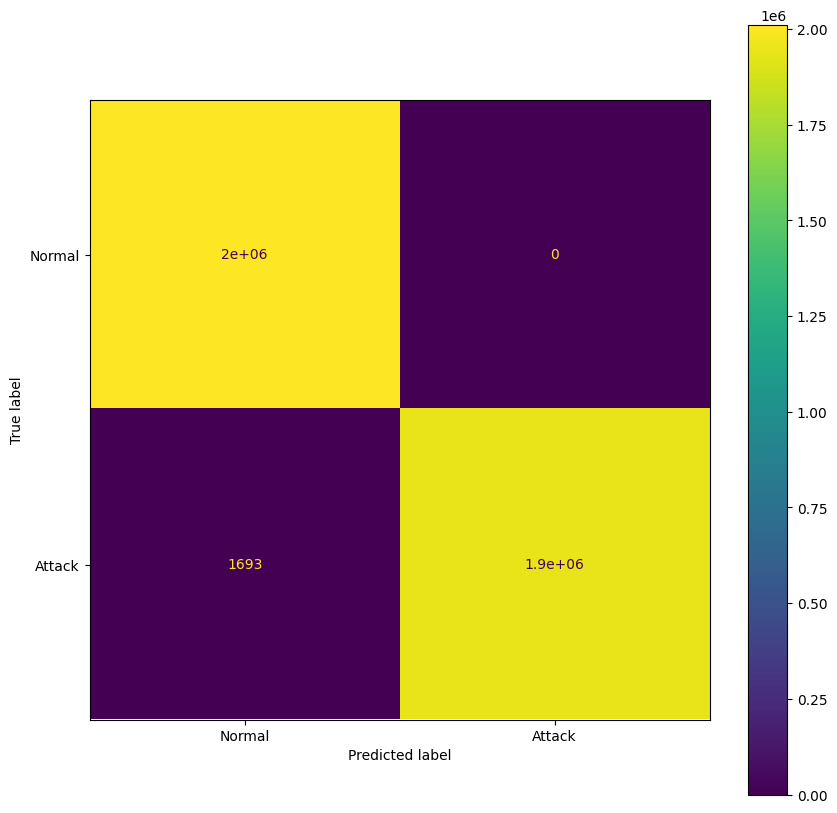

In [6]:
rf = RandomForestClassifier(max_depth=10).fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

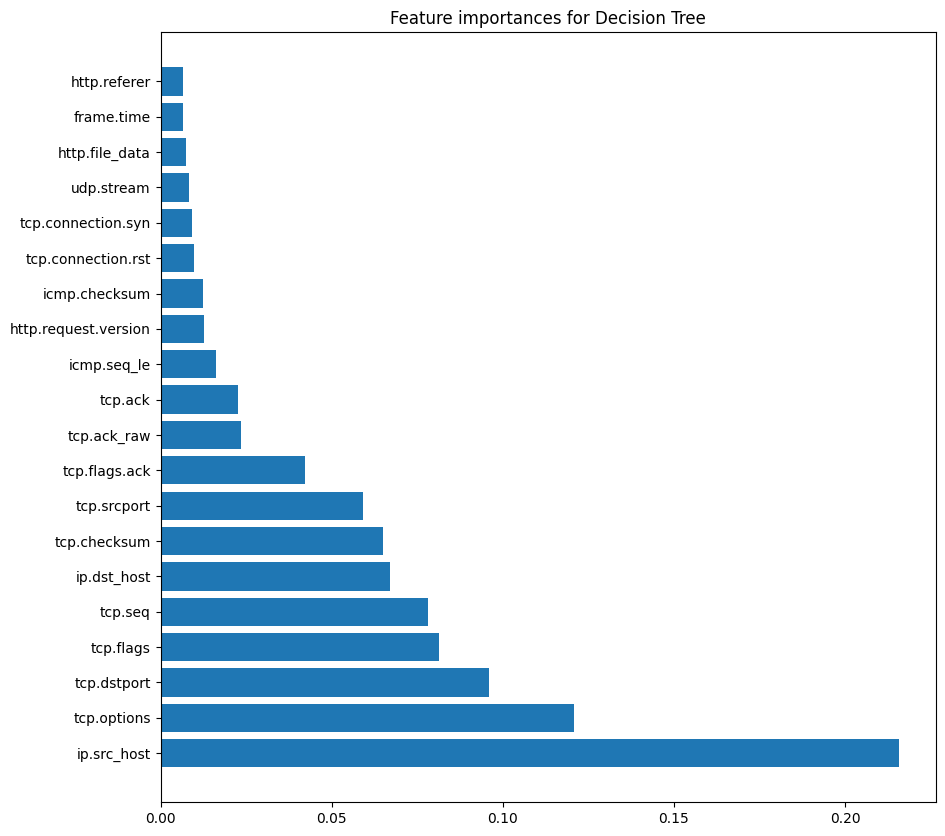

In [7]:
f_importances(abs(rf.feature_importances_), features_names, top=20)

# **Decision Tree**

Training Accuracy DecisionTreeClassifier 99.81984428898852  Test Accuracy DecisionTreeClassifier 99.8205852824155
Training Precesion DecisionTreeClassifier 99.9997249294891  Test Precesion DecisionTreeClassifier 99.9997112323202
Training Recall DecisionTreeClassifier 99.63379575685978  Test Recall DecisionTreeClassifier 99.63538211510433


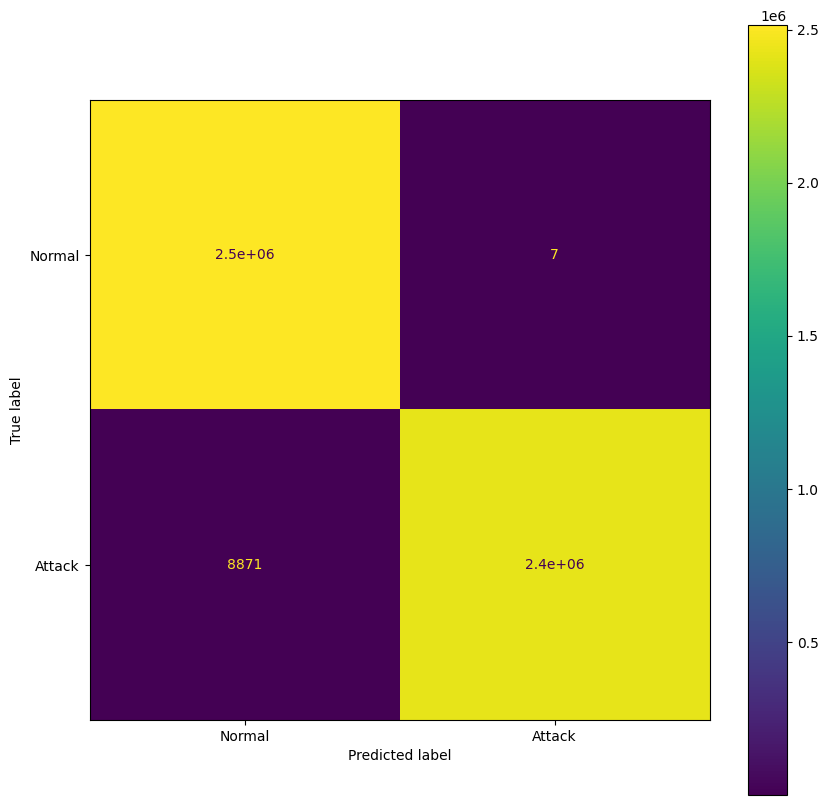

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
evaluate_classification(dt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

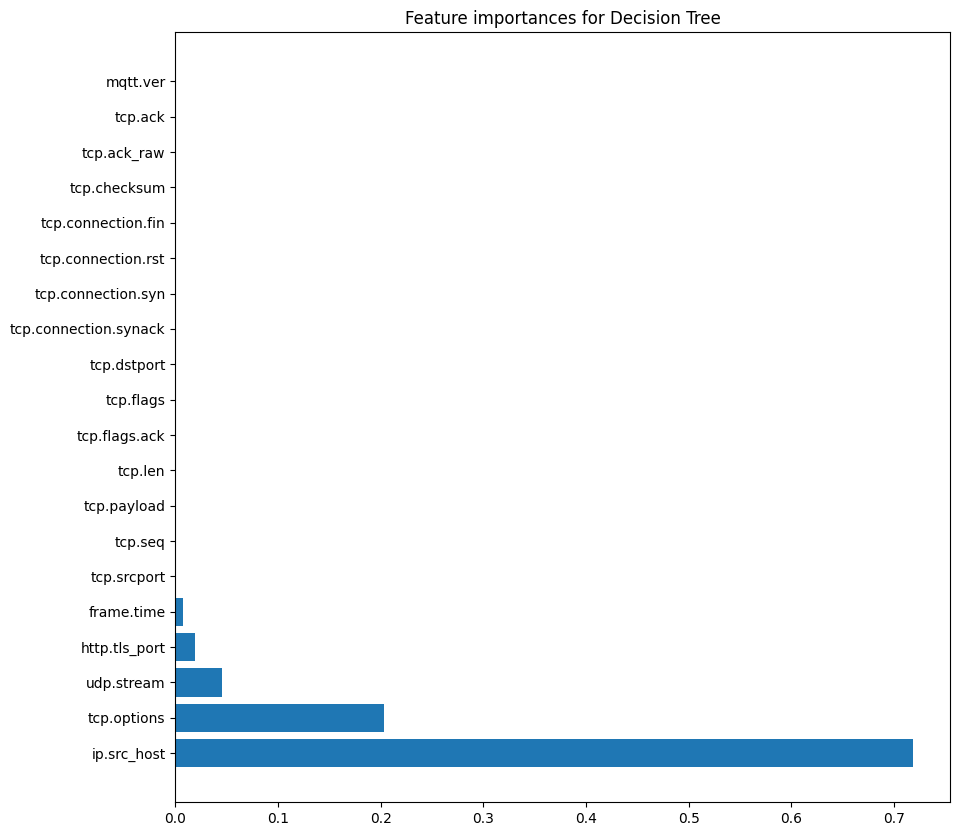

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature importances for Decision Tree')
    plt.show()

features_names = df.drop(['Attack_label', 'Attack_type'] , axis = 1)
f_importances(abs(dt.feature_importances_), features_names, top=20)

[Text(0.5, 0.875, 'x[1] <= 9.5\ngini = 0.5\nsamples = 14844936\nvalue = [7547369, 7297567]'),
 Text(0.25, 0.625, 'x[28] <= 1104.5\ngini = 0.234\nsamples = 8671465\nvalue = [7498977, 1172488]'),
 Text(0.125, 0.375, 'x[32] <= 454.5\ngini = 0.051\nsamples = 7621370\nvalue = [7421798, 199572]'),
 Text(0.0625, 0.125, 'gini = 0.007\nsamples = 7448522\nvalue = [7421798, 26724]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 172848\nvalue = [0, 172848]'),
 Text(0.375, 0.375, 'x[16] <= 0.5\ngini = 0.136\nsamples = 1050095\nvalue = [77179, 972916]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 972916\nvalue = [0, 972916]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 77179\nvalue = [77179, 0]'),
 Text(0.75, 0.625, 'x[39] <= 2.5\ngini = 0.016\nsamples = 6173471\nvalue = [48392, 6125079]'),
 Text(0.625, 0.375, 'x[1] <= 11.5\ngini = 0.0\nsamples = 6059067\nvalue = [20, 6059047]'),
 Text(0.5625, 0.125, 'gini = 0.283\nsamples = 88\nvalue = [15, 73]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 605897

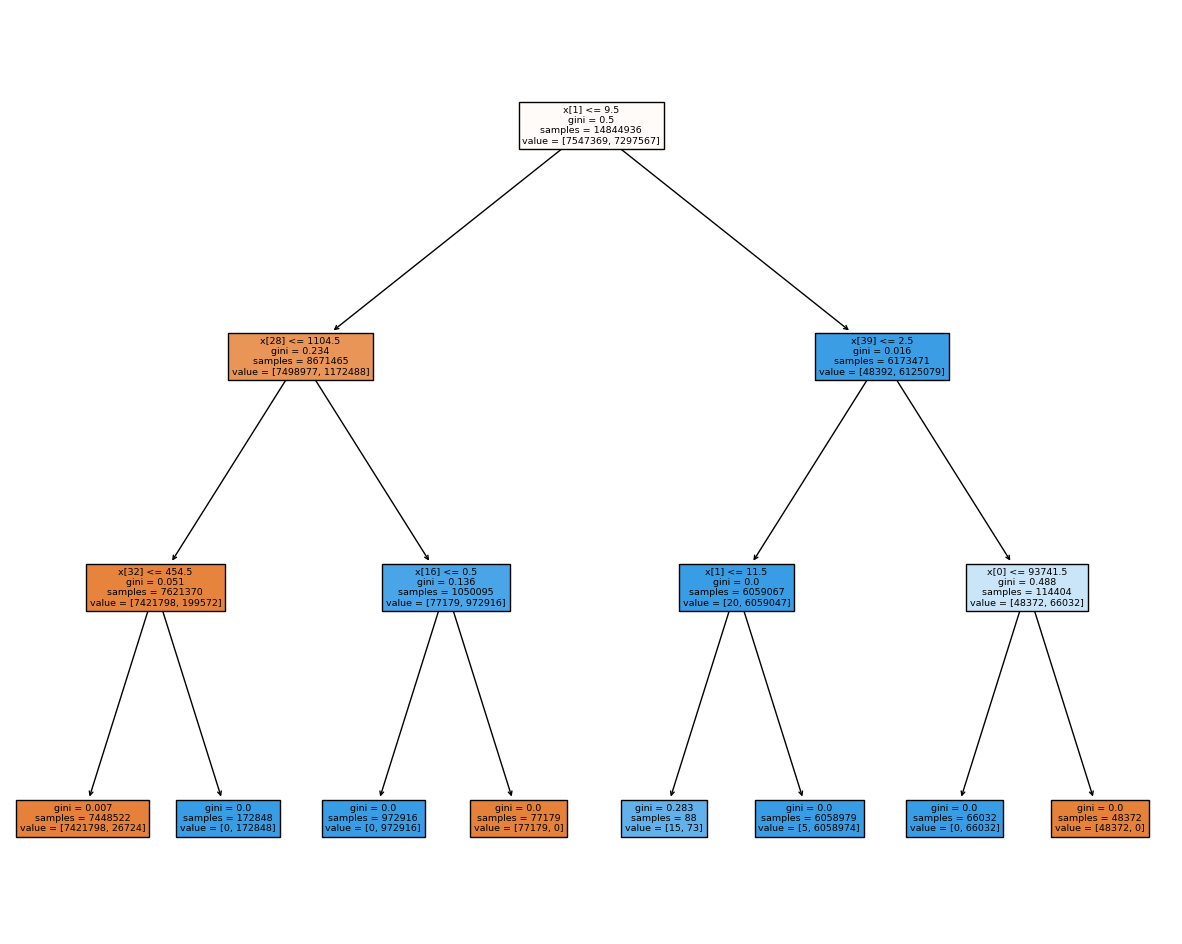

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

# **Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 99.5009746084456  Test Accuracy Logistic Regression 99.50178970121529
Training Precesion Logistic Regression 99.78974332887923  Test Precesion Logistic Regression 99.79423196128451
Training Recall Logistic Regression 99.19386831254855  Test Recall Logistic Regression 99.19123141459903


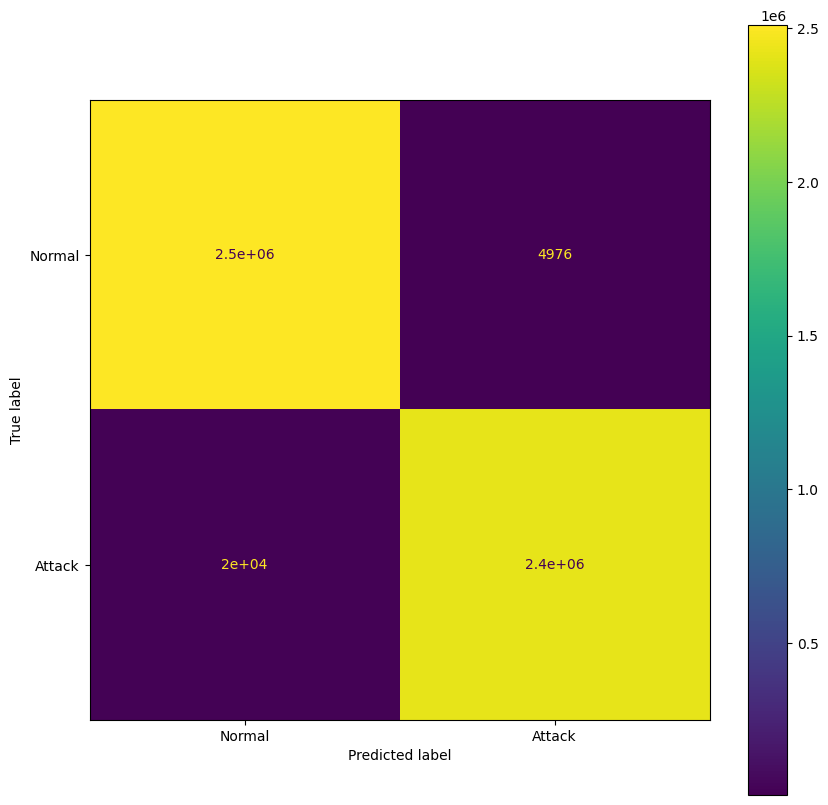

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

# **Naive Bayes**

Training Accuracy GaussianNB 96.00404474630271  Test Accuracy GaussianNB 96.01215525617624
Training Precesion GaussianNB 99.25960377009143  Test Precesion GaussianNB 99.26517415588462
Training Recall GaussianNB 92.56174009776134  Test Recall GaussianNB 92.5745532804101


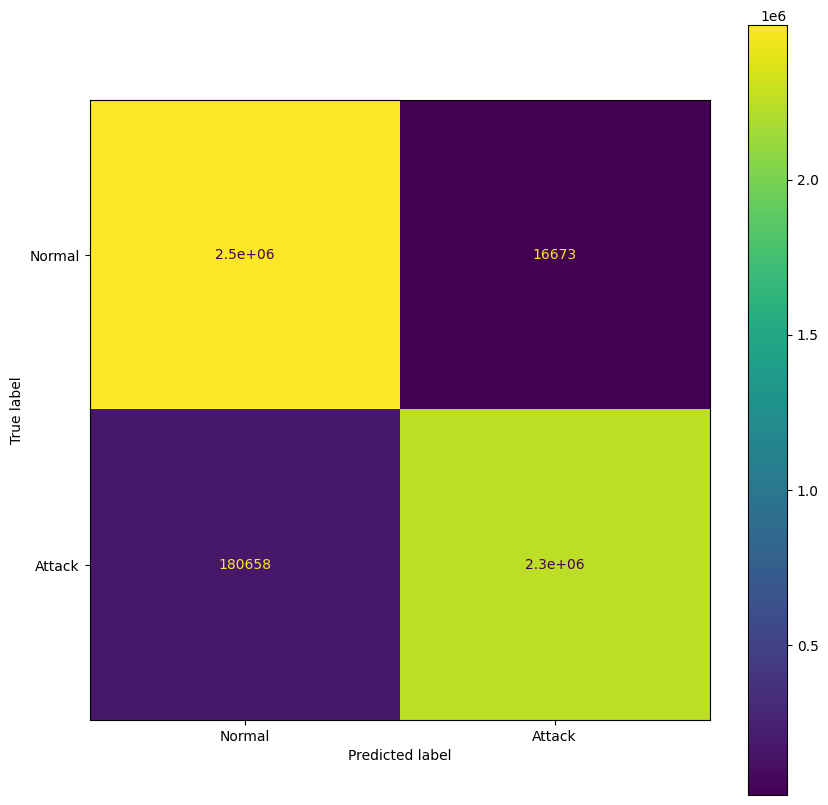

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)